In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
def append_directory(path):
    fits_list = []
    
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".fits.gz"):
                element = str(path) + str(file)
                fits_list.append(element)
    return fits_list

In [4]:
# This is pointing to where my files are located on my computer
fits_list = append_directory('/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/')

In [5]:
from newer_Galaxy import SpiralGalaxy

INFO: No release version set. Setting default to MPL-7


In [6]:
def append_usable_galaxies(fits_list):
    usable_galaxy_list = []
    load_failure = []
    
    for path in fits_list:
        try:
            try:
                gal = SpiralGalaxy(path)
                
            except:
                gal = SpiralGalaxy(path)
                
        except Exception as e:
            load_failure.append((path.split('/')[-1].split('_')[0], e))
            continue
            
        if gal.check_usability(threshold=5, pix_percentage=1.0):
            usable_galaxy_list.append(gal)
            
    return usable_galaxy_list, load_failure

In [7]:
import numpy as np

gal_list = np.load('usable_gals.npy')

In [8]:
usable_path_list = []

for i in range(len(fits_list)):
    if fits_list[i].split('/')[-1].split('_')[0] in gal_list:
        usable_path_list.append(fits_list[i])

In [9]:
%%time

i = 0

gal_objs = []

for path in usable_path_list:
    gal = SpiralGalaxy(path)
    gal_objs.append(gal)
    
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


/homes/sshamsi/.local/lib/python3.5/site-packages/marvin/utils/general/general.py:354: MarvinUserWarning: more than one plate-ifu found for mangaid=1-211017. Using the one with the highest SN2.
  MarvinUserWarning)


34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
CPU times: user 1min 23s, sys: 1.61 s, total: 1min 24s
Wall time: 1min 31s


In [10]:
%%time

i = 0

for gal in gal_objs:
    gal.form_global_df()
    
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
CPU times: user 56.8 s, sys: 1.4 s, total: 58.2 s
Wall time: 58.2 s


In [11]:
for gal in gal_objs:
    gal.df['Mass'] = gal.mass

In [12]:
for gal in gal_objs:
    gal.df['$\lg{Mass}$'] = gal.lgmass

In [13]:
for gal in gal_objs:
    map_ha = gal.maps.getMap('emline_gflux', channel='ha_6564')
    map_hb = gal.maps.getMap('emline_gflux', channel='hb_4862')

    ha_snr = map_ha.snr.flatten()
    hb_snr = map_hb.snr.flatten()

    gal.df['S/N $H_{\\alpha}$'] = ha_snr
    gal.df['S/N $H_{\\beta}$'] = hb_snr

### Make total SFR Histogram

In [14]:
tot_sfrs = []

for gal in gal_objs:
    df = gal.df
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    
    sfr, stdv = gal.get_sfr(df.index, avg=False)
    
    tot_sfrs.append(sfr)

/raid5/homes/sshamsi/galaxy_zoo/GZ3D_spiral_analysis/newer_Galaxy.py:134: RuntimeWarning: invalid value encountered in double_scalars
  sfr = (self.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / self.spax_area


In [15]:
tot_sfr_spirals = []

for gal in gal_objs:
    df = gal.df
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    df = df[df['Spiral Arm'] == 1]
    
    sfr, stdv = gal.get_sfr(df.index, avg=False)
    
    tot_sfr_spirals.append(sfr)

In [16]:
pc_tot_sfr = []

for i in range(len(tot_sfr_spirals)):
    pc = tot_sfr_spirals[i] * 100 / tot_sfrs[i]
    pc_tot_sfr.append(pc)

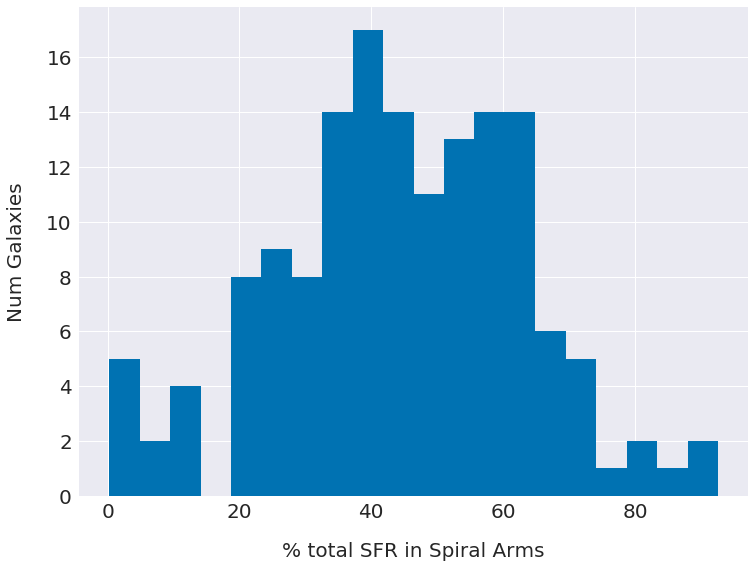

In [19]:
fig = plt.figure(figsize=(12, 9))

plt.hist(pc_tot_sfr, bins = 20)

plt.xlabel('% total SFR in Spiral Arms', labelpad=20, size=20)
plt.ylabel('Num Galaxies', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('sfr_in_spirals_hist')

### Make average SFR Histogram

In [20]:
avg_sfrs = []

for gal in gal_objs:
    df = gal.df
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    
    sfr, stdv = gal.get_sfr(df.index, avg=True)
    
    avg_sfrs.append(sfr)

In [21]:
avg_sfr_spirals = []

for gal in gal_objs:
    df = gal.df
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    df = df[df['Spiral Arm'] == 1]
    
    sfr, stdv = gal.get_sfr(df.index, avg=True)
    
    avg_sfr_spirals.append(sfr)

In [30]:
pc_avg_sfr = []

for i in range(len(tot_sfr_spirals)):
    pc = avg_sfr_spirals[i] / avg_sfrs[i]
    pc_avg_sfr.append(pc)

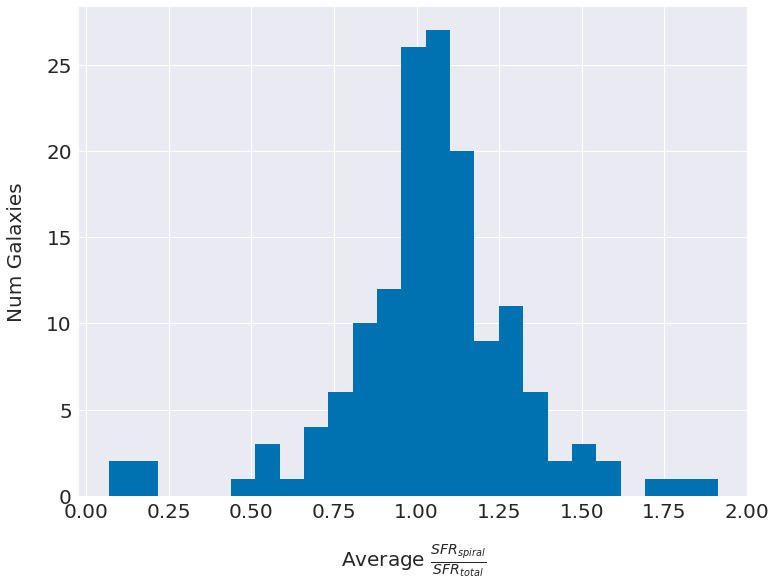

In [31]:
fig = plt.figure(figsize=(12, 9))

plt.hist(pc_avg_sfr, bins = 25)

plt.xlabel(r'Average $\frac{SFR_{spiral}}{SFR_{total}}$', labelpad=20, size=20)
plt.ylabel('Num Galaxies', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('sfr_in_spirals_hist')

### Next we will bin our galaxies into mass groups and plot the total % SFR in Spiral Arms

In [37]:
for gal in gal_objs:
    gal.df['MaNGA ID'] = gal.mangaid

In [38]:
mangaid_list = []

for gal in gal_objs:
    mangaid_list.append(gal.mangaid)

In [39]:
df_list = []

for gal in gal_objs:
    df_list.append(gal.df)

In [40]:
spax_df = pd.concat(df_list)

In [41]:
spax_df = spax_df.dropna()
spax_df = spax_df[(spax_df.Comp == 0) & (spax_df.AGN == 0) & (spax_df.Seyfert == 0) & (spax_df.Liner == 0)]
spax_df = spax_df[(spax_df['$r/r_e$'] <= 1) & (spax_df['$r/r_e$'] >= 0.1)]
spax_df = spax_df[(spax_df['S/N $H_{\\alpha}$'] >= 3) & (spax_df['S/N $H_{\\beta}$'] >= 3)]

In [42]:
spax_df

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Comp,AGN,Seyfert,Liner,$r/r_e$,Spiral Arm,Mass,$\lg{Mass}$,S/N $H_{\alpha}$,S/N $H_{\beta}$,MaNGA ID
1764,11.997665,0.786094,0.030061,0.171968,0.029375,0.0,0.0,0.0,0.0,0.979344,False,2.226830e+11,11.347687,26.150328,5.854283,1-109308
1765,11.793067,0.697728,0.028429,0.149700,0.027367,0.0,0.0,0.0,0.0,0.962643,False,2.226830e+11,11.347687,24.542965,5.470157,1-109308
1766,11.802633,0.541168,0.029345,0.095138,0.023748,0.0,0.0,0.0,0.0,0.963424,False,2.226830e+11,11.347687,18.441414,4.006091,1-109308
1834,11.957914,0.792545,0.029416,0.133767,0.027642,0.0,0.0,0.0,0.0,0.976099,False,2.226830e+11,11.347687,26.942406,4.839194,1-109308
1835,11.349176,0.861909,0.028596,0.172492,0.026646,0.0,0.0,0.0,0.0,0.926409,True,2.226830e+11,11.347687,30.141342,6.473502,1-109308
1836,10.941167,0.899165,0.032200,0.179711,0.028678,0.0,0.0,0.0,0.0,0.893104,True,2.226830e+11,11.347687,27.924206,6.266562,1-109308
1837,10.756754,0.832745,0.029660,0.152309,0.025783,0.0,0.0,0.0,0.0,0.878051,False,2.226830e+11,11.347687,28.076826,5.907425,1-109308
1838,10.807388,0.662477,0.026681,0.087502,0.019808,0.0,0.0,0.0,0.0,0.882184,False,2.226830e+11,11.347687,24.829538,4.417412,1-109308
1905,11.733803,0.779113,0.033132,0.120216,0.028803,0.0,0.0,0.0,0.0,0.957805,False,2.226830e+11,11.347687,23.515188,4.173698,1-109308
1906,10.920948,0.797542,0.033273,0.139530,0.030301,0.0,0.0,0.0,0.0,0.891454,False,2.226830e+11,11.347687,23.969484,4.604856,1-109308


In [43]:
spax_df['Mass Bin'] = pd.qcut(spax_df['Mass'], q=10, labels=range(10))

In [45]:
spax_df

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Comp,AGN,Seyfert,Liner,$r/r_e$,Spiral Arm,Mass,$\lg{Mass}$,S/N $H_{\alpha}$,S/N $H_{\beta}$,MaNGA ID,Mass Bin
1764,11.997665,0.786094,0.030061,0.171968,0.029375,0.0,0.0,0.0,0.0,0.979344,False,2.226830e+11,11.347687,26.150328,5.854283,1-109308,9
1765,11.793067,0.697728,0.028429,0.149700,0.027367,0.0,0.0,0.0,0.0,0.962643,False,2.226830e+11,11.347687,24.542965,5.470157,1-109308,9
1766,11.802633,0.541168,0.029345,0.095138,0.023748,0.0,0.0,0.0,0.0,0.963424,False,2.226830e+11,11.347687,18.441414,4.006091,1-109308,9
1834,11.957914,0.792545,0.029416,0.133767,0.027642,0.0,0.0,0.0,0.0,0.976099,False,2.226830e+11,11.347687,26.942406,4.839194,1-109308,9
1835,11.349176,0.861909,0.028596,0.172492,0.026646,0.0,0.0,0.0,0.0,0.926409,True,2.226830e+11,11.347687,30.141342,6.473502,1-109308,9
1836,10.941167,0.899165,0.032200,0.179711,0.028678,0.0,0.0,0.0,0.0,0.893104,True,2.226830e+11,11.347687,27.924206,6.266562,1-109308,9
1837,10.756754,0.832745,0.029660,0.152309,0.025783,0.0,0.0,0.0,0.0,0.878051,False,2.226830e+11,11.347687,28.076826,5.907425,1-109308,9
1838,10.807388,0.662477,0.026681,0.087502,0.019808,0.0,0.0,0.0,0.0,0.882184,False,2.226830e+11,11.347687,24.829538,4.417412,1-109308,9
1905,11.733803,0.779113,0.033132,0.120216,0.028803,0.0,0.0,0.0,0.0,0.957805,False,2.226830e+11,11.347687,23.515188,4.173698,1-109308,9
1906,10.920948,0.797542,0.033273,0.139530,0.030301,0.0,0.0,0.0,0.0,0.891454,False,2.226830e+11,11.347687,23.969484,4.604856,1-109308,9


In [65]:
def make_total_sfrs(spax_df, mangaid_list, gal_objs):
    unique_ids = spax_df['MaNGA ID'].unique()
    
    ncorr_sfrs, ncorr_sfr_stdvs = [], []
    ncorr_spiral_sfrs, ncorr_spiral_sfr_stdvs = [], []
    ncorr_nspiral_sfrs, ncorr_nspiral_sfr_stdvs = [], []
    
    for mangaid in unique_ids:
        df = spax_df[spax_df['MaNGA ID'] == mangaid]
        df_spiral = df[df['Spiral Arm'] == True]
        df_nspiral = df[df['Spiral Arm'] == False]
        
        index = mangaid_list.index(mangaid)
        
        sfr, sfr_stdv = gal_objs[index].get_sfr(df.index, avg=False)
        sfr_spiral, sfr_spiral_stdv = gal_objs[index].get_sfr(df_spiral.index, avg=False)
        sfr_nspiral, sfr_nspiral_stdv = gal_objs[index].get_sfr(df_nspiral.index, avg=False)
        
        ncorr_sfrs.append(sfr)
        ncorr_sfr_stdvs.append(sfr_stdv)
        
        ncorr_spiral_sfrs.append(sfr_spiral)
        ncorr_spiral_sfr_stdvs.append(sfr_spiral_stdv)
        
        ncorr_nspiral_sfrs.append(sfr_nspiral)
        ncorr_nspiral_sfr_stdvs.append(sfr_nspiral_stdv)
        
    tot_sfr = sum(ncorr_sfrs)
    tot_sfr_stdv = np.sqrt(np.square(ncorr_sfr_stdvs).sum())
    
    tot_sfr_spiral = sum(ncorr_spiral_sfrs)
    tot_sfr_stdv_spiral = np.sqrt(np.square(ncorr_spiral_sfr_stdvs).sum())
    
    tot_sfr_nspiral = sum(ncorr_nspiral_sfrs)
    tot_sfr_stdv_nspiral = np.sqrt(np.square(ncorr_nspiral_sfr_stdvs).sum())
    
    return tot_sfr, tot_sfr_stdv, tot_sfr_spiral, tot_sfr_stdv_spiral, tot_sfr_nspiral, tot_sfr_stdv_nspiral

In [66]:
bin_sfr, bin_sfr_stdv = [], []
bin_sfr_spiral, bin_sfr_spiral_stdv = [], []
bin_sfr_nspiral, bin_sfr_nspiral_stdv = [], []

for label in range(10):
    bin_df = spax_df[spax_df['Mass Bin'] == label]
    
    ans = make_total_sfrs(bin_df, mangaid_list, gal_objs)
    
    bin_sfr.append(ans[0])
    bin_sfr_stdv.append(ans[1])
    bin_sfr_spiral.append(ans[2])
    bin_sfr_spiral_stdv.append(ans[3])
    bin_sfr_nspiral.append(ans[4])
    bin_sfr_nspiral_stdv.append(ans[5])

/raid5/homes/sshamsi/galaxy_zoo/GZ3D_spiral_analysis/newer_Galaxy.py:134: RuntimeWarning: invalid value encountered in double_scalars
  sfr = (self.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / self.spax_area


In [67]:
bin_sfr_spiral_pc = []
bin_sfr_spiral_pc_stdv = []

for i in range(10):
    sfr_spiral_pc = 100 * bin_sfr_spiral[i] / bin_sfr[i]
    
    sfr_spiral_pc_stdv = sfr_spiral_pc * np.sqrt((bin_sfr_spiral_stdv[i] / bin_sfr_spiral[i])**2 +
                                                 (bin_sfr_stdv[i]/bin_sfr[i])**2)
    
    bin_sfr_spiral_pc.append(sfr_spiral_pc)
    bin_sfr_spiral_pc_stdv.append(sfr_spiral_pc_stdv)

(array([36., 38., 40., 42., 44., 46., 48., 50., 52., 54.]),
 <a list of 10 Text yticklabel objects>)

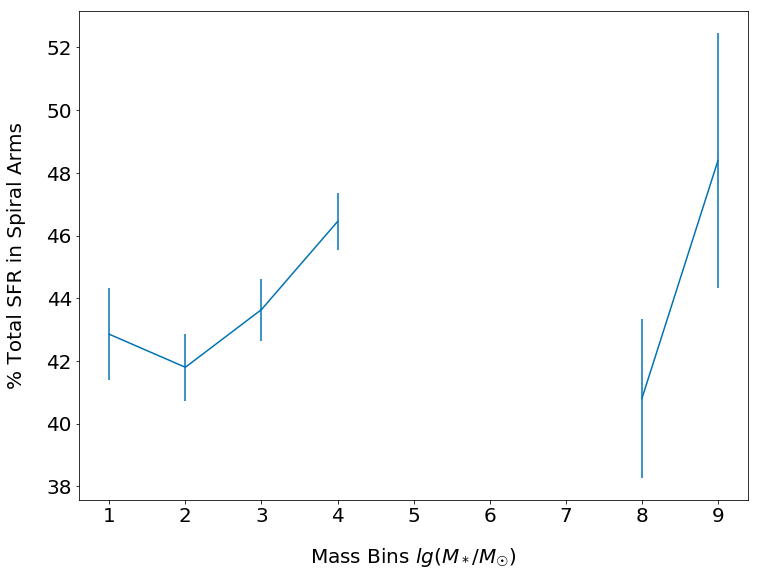

In [68]:
plt.figure(figsize=(12, 9))

plt.errorbar(range(10), bin_sfr_spiral_pc, yerr=bin_sfr_spiral_pc_stdv)

plt.xlabel('Mass Bins $lg(M_*/M_☉)$', labelpad=20, size=20)
plt.ylabel('% Total SFR in Spiral Arms', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [100]:
ex_df = spax_df[spax_df['Mass Bin'] == 0]

unique_ids = ex_df['MaNGA ID'].unique()
    
ncorr_sfrs, ncorr_sfr_stdvs = [], []
ncorr_spiral_sfrs, ncorr_spiral_sfr_stdvs = [], []
ncorr_nspiral_sfrs, ncorr_nspiral_sfr_stdvs = [], []

for mangaid in unique_ids:
    df = ex_df[ex_df['MaNGA ID'] == mangaid]
    df_spiral = df[df['Spiral Arm'] == True]
    df_nspiral = df[df['Spiral Arm'] == False]

    index = mangaid_list.index(mangaid)

    sfr, sfr_stdv = gal_objs[index].get_sfr(df.index, avg=False)
    sfr_spiral, sfr_spiral_stdv = gal_objs[index].get_sfr(df_spiral.index, avg=False)
    sfr_nspiral, sfr_nspiral_stdv = gal_objs[index].get_sfr(df_nspiral.index, avg=False)

    ncorr_sfrs.append(sfr)
    ncorr_sfr_stdvs.append(sfr_stdv)

    ncorr_spiral_sfrs.append(sfr_spiral)
    ncorr_spiral_sfr_stdvs.append(sfr_spiral_stdv)

    ncorr_nspiral_sfrs.append(sfr_nspiral)
    ncorr_nspiral_sfr_stdvs.append(sfr_nspiral_stdv)

tot_sfr = sum(ncorr_sfrs)
tot_sfr_stdv = np.sqrt(np.square(ncorr_sfr_stdvs).sum())

tot_sfr_spiral = sum(ncorr_spiral_sfrs)
tot_sfr_stdv_spiral = np.sqrt(np.square(ncorr_spiral_sfr_stdvs).sum())

tot_sfr_nspiral = sum(ncorr_nspiral_sfrs)
tot_sfr_stdv_nspiral = np.sqrt(np.square(ncorr_nspiral_sfr_stdvs).sum())

In [105]:
unique_ids[5]

'1-24124'

In [106]:
spax_df[(spax_df['MaNGA ID'] == '1-24124') & (spax_df['Mass Bin'] == 0)]

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Comp,AGN,Seyfert,Liner,$r/r_e$,Spiral Arm,Mass,$\lg{Mass}$,S/N $H_{\alpha}$,S/N $H_{\beta}$,MaNGA ID,Mass Bin
768,5.319175,0.051064,0.016434,0.079698,0.023477,0.0,0.0,0.0,0.0,0.571339,False,2.872520e+09,9.458263,3.107225,3.394674,1-24124,0


### We're going to make a S/N scatterplot

In [52]:
for gal in gal_objs:
    map_ha = gal.maps.getMap('emline_gflux', channel='ha_6564')
    map_hb = gal.maps.getMap('emline_gflux', channel='hb_4862')
    
    ha_snr = map_ha.snr.flatten()
    hb_snr = map_hb.snr.flatten()
    
    gal.df['S/N $H_{\\alpha}$'] = ha_snr
    gal.df['S/N $H_{\\beta}$'] = hb_snr
    
    gal.df['% SFR Error'] = (gal.df['$\sigma$SFR'] * 100) / gal.df['SFR']

In [56]:
df_list = []

for gal in gal_objs:
    df_list.append(gal.df)
    
spax_df = pd.concat(df_list)

In [57]:
spax_df = spax_df.dropna()

In [58]:
spax_df = spax_df[(spax_df.Comp == 0) & (spax_df.AGN == 0) & (spax_df.Seyfert == 0) & (spax_df.Liner == 0)]

In [59]:
spax_df = spax_df[(spax_df['$r/r_e$'] <= 1) & (spax_df['$r/r_e$'] >= 0.1)]

In [62]:
global_ha_snr = spax_df['S/N $H_{\\alpha}$'].tolist()
global_hb_snr = spax_df['S/N $H_{\\beta}$'].tolist()
global_sfr = spax_df['SFR'].tolist()
global_pcerr_sfr = spax_df['% SFR Error'].tolist()

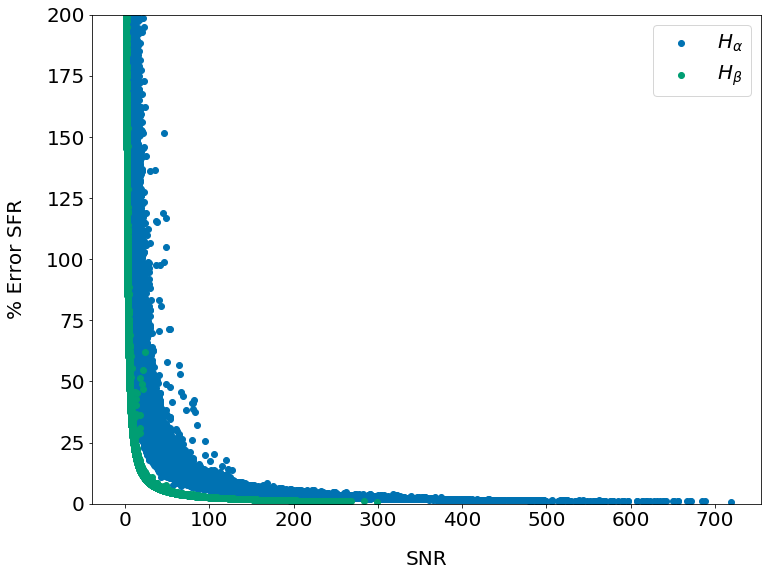

In [77]:
plt.figure(figsize=(12, 9))

plt.scatter(global_ha_snr, global_pcerr_sfr, label='$H_{\\alpha}$')
plt.scatter(global_hb_snr, global_pcerr_sfr, label='$H_{\\beta}$')

plt.xlabel('SNR', labelpad=20, size=20)
plt.ylabel('% Error SFR', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)

plt.ylim(0, 200)
plt.legend(fontsize=20)

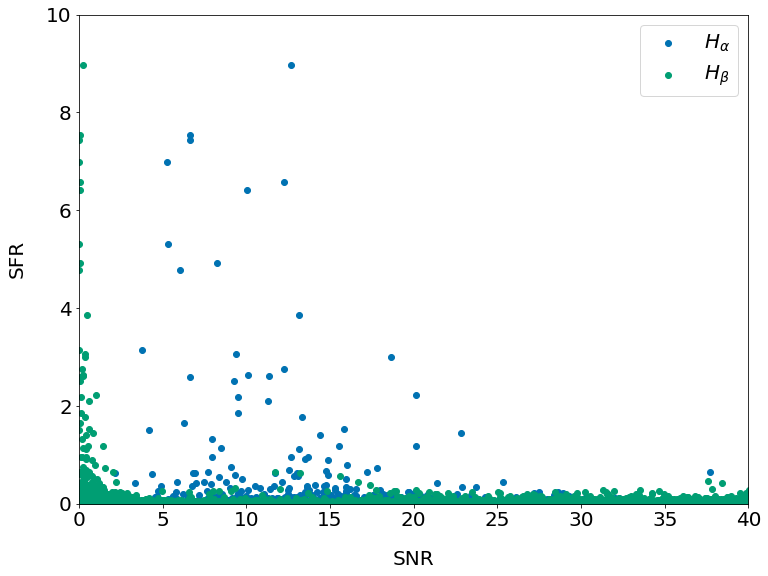

In [85]:
plt.figure(figsize=(12, 9))

plt.scatter(global_ha_snr, global_sfr, label='$H_{\\alpha}$')
plt.scatter(global_hb_snr, global_sfr, label='$H_{\\beta}$')

plt.xlabel('SNR', labelpad=20, size=20)
plt.ylabel('SFR', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)

plt.ylim(0, 10)
plt.xlim(0, 40)

plt.legend(fontsize=20)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

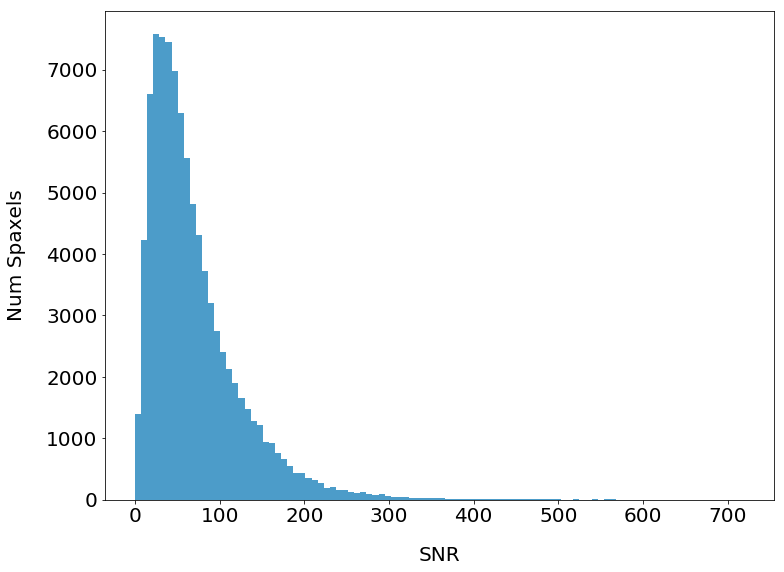

In [82]:
plt.figure(figsize=(12, 9))

plt.hist(global_ha_snr, bins=100, alpha=0.7)

plt.xlabel('SNR', labelpad=20, size=20)
plt.ylabel('Num Spaxels', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [46]:
lst = [1, 2, 4, 6]

In [48]:
foo = np.sqrt(lst)

In [50]:
sum(foo)

6.863703305156273

In [108]:
np.save('usable_path_list', usable_path_list)